In [2]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
matplotlib.use('Agg')
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
shoes = Table().read_table('Shoe Sales.csv')

In [4]:
shoes

Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11,Rhode Island
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11,California
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10,New York
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Kansas
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Florida


In [5]:
sneakernames = shoes.group('Sneaker Name')

In [6]:
sneakernames.show()

Sneaker Name,count
Adidas-Yeezy-Boost-350-Low-Moonrock,100
Adidas-Yeezy-Boost-350-Low-Oxford-Tan,70
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,95
Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,122
Adidas-Yeezy-Boost-350-Low-Turtledove,68
Adidas-Yeezy-Boost-350-Low-V2-Beluga,498
Adidas-Yeezy-Boost-350-V2-Beluga-2pt0,10395
Adidas-Yeezy-Boost-350-V2-Blue-Tint,9297
Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,225
Adidas-Yeezy-Boost-350-V2-Core-Black-Green,196


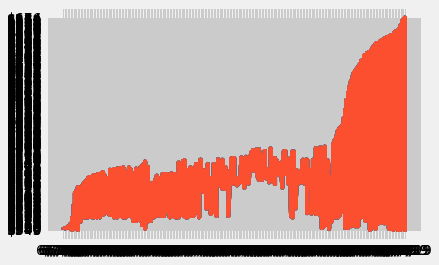

In [7]:
def get_row(sneaker):
    return shoes.where('Sneaker Name', are.containing(sneaker))

def plotit(sneaker):
    row = shoes.where('Sneaker Name', are.containing('adidas')).where('Shoe Size', are.below(7))
    x = row.column('Order Date')
    y = row.column('Sale Price')
    plots.plot(x, y)

for name in sneakernames.column(0)[0:20]:
    plotit(name)
    
    

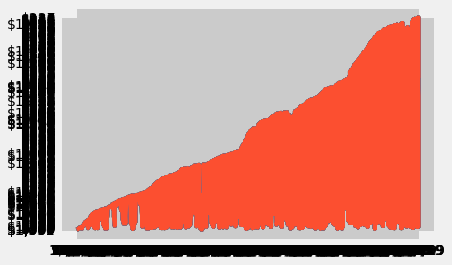

In [8]:
def get_row(sneaker):
    return shoes.where('Sneaker Name', are.containing(sneaker))

def plotit(sneaker):
    row = shoes.where('Sneaker Name', are.containing('Nike')).where('Shoe Size', are.below(7))
    x = row.column('Order Date')
    y = row.column('Sale Price')
    plots.plot(x, y)

for name in sneakernames.column(0)[0:20]:
    plotit(name)

In [9]:
shoes.column(2)

array(['Adidas-Yeezy-Boost-350-Low-V2-Beluga',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Copper',
       'Adidas-Yeezy-Boost-350-V2-Core-Black-Green', ...,
       'adidas-Yeezy-Boost-350-V2-Static-Reflective',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective',
       'adidas-Yeezy-Boost-350-V2-Static-Reflective'], dtype='<U49')

In [10]:
colors = ['Beluga','Cream', 'White','Copper','Green','Red','Zebra','Black','Moonrock','Chicago','Tan','Turtledove','Blue','Yellow','Butter','Sesame','Static','Reflective','Desert','University','Volt','Pink','Silver','Eve','Rose','Menta','Reaper','Orange']

In [11]:
shoedict = {}
counter = 0
for shoe in shoes.column(2):
    colors_list = []
    shoe_list = shoe.split("-")
    for char in shoe_list:
        if char in colors and 'Off' not in colors:
            colors_list.append(char)
    shoedict[counter] = colors_list
    counter += 1
        


In [12]:
shoedict

{0: ['Beluga'],
 1: ['Black', 'Copper'],
 2: ['Black', 'Green'],
 3: ['Black', 'Red'],
 4: ['Black', 'Red'],
 5: ['Black', 'Red'],
 6: ['Black', 'White'],
 7: ['Cream', 'White'],
 8: ['Cream', 'White'],
 9: ['Cream', 'White'],
 10: ['Cream', 'White'],
 11: ['Cream', 'White'],
 12: ['Cream', 'White'],
 13: ['Zebra'],
 14: ['Zebra'],
 15: ['Zebra'],
 16: ['Zebra'],
 17: ['Zebra'],
 18: ['Zebra'],
 19: ['Zebra'],
 20: ['Zebra'],
 21: ['Zebra'],
 22: ['Zebra'],
 23: ['Beluga'],
 24: ['Black', 'Red'],
 25: ['Black', 'Red'],
 26: ['Black', 'Red'],
 27: ['Black', 'White'],
 28: ['Cream', 'White'],
 29: ['Cream', 'White'],
 30: ['Cream', 'White'],
 31: ['Zebra'],
 32: ['Zebra'],
 33: ['Zebra'],
 34: ['Zebra'],
 35: ['Zebra'],
 36: ['Zebra'],
 37: ['Zebra'],
 38: ['Beluga'],
 39: ['Black', 'Red'],
 40: ['Black', 'Red'],
 41: ['Black', 'Red'],
 42: ['Black', 'White'],
 43: ['Black', 'White'],
 44: ['Cream', 'White'],
 45: ['Cream', 'White'],
 46: ['Cream', 'White'],
 47: ['Cream', 'White'],
 48:

In [13]:
shoes = shoes.with_column('Colors', shoedict.values())

C:\Users\chris\anaconda3\lib\site-packages\datascience\tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array(tuple(values))


In [14]:
shoes.show(1000)

Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Colors
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11,California,['Beluga']
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11,California,"['Black', 'Copper']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11,California,"['Black', 'Green']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky,"['Black', 'Red']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11,Rhode Island,"['Black', 'Red']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan,"['Black', 'Red']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11,California,"['Black', 'White']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10,New York,"['Cream', 'White']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Kansas,"['Cream', 'White']"
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Florida,"['Cream', 'White']"


In [15]:
versions = ['V1', 'V2', 'V3', '90', '1', '91', '92', '93', '94', '95', '96', '97', '98', '99',"VaporMax", 'Presto', 'Blazer',"Hyperdunk", 'Zoom']
versiondict = {}
counter = 0
for shoe in shoes.column(2):
    colors_list = []
    shoe_list = shoe.split("-")
    for char in shoe_list:
        if char in versions:
            colors_list.append(char)
        if char == "Yeezy" and 'V2' not in shoe_list:
            colors_list.append('V1')
        
    versiondict[counter] = colors_list
    counter += 1
        


In [16]:
versiondict

{0: ['V2'],
 1: ['V2'],
 2: ['V2'],
 3: ['V2'],
 4: ['V2'],
 5: ['V2'],
 6: ['V2'],
 7: ['V2'],
 8: ['V2'],
 9: ['V2'],
 10: ['V2'],
 11: ['V2'],
 12: ['V2'],
 13: ['V2'],
 14: ['V2'],
 15: ['V2'],
 16: ['V2'],
 17: ['V2'],
 18: ['V2'],
 19: ['V2'],
 20: ['V2'],
 21: ['V2'],
 22: ['V2'],
 23: ['V2'],
 24: ['V2'],
 25: ['V2'],
 26: ['V2'],
 27: ['V2'],
 28: ['V2'],
 29: ['V2'],
 30: ['V2'],
 31: ['V2'],
 32: ['V2'],
 33: ['V2'],
 34: ['V2'],
 35: ['V2'],
 36: ['V2'],
 37: ['V2'],
 38: ['V2'],
 39: ['V2'],
 40: ['V2'],
 41: ['V2'],
 42: ['V2'],
 43: ['V2'],
 44: ['V2'],
 45: ['V2'],
 46: ['V2'],
 47: ['V2'],
 48: ['V2'],
 49: ['V2'],
 50: ['V2'],
 51: ['V2'],
 52: ['V2'],
 53: ['V2'],
 54: ['V2'],
 55: ['V2'],
 56: ['V2'],
 57: ['V2'],
 58: ['V2'],
 59: ['V2'],
 60: ['V2'],
 61: ['V2'],
 62: ['V2'],
 63: ['V2'],
 64: ['V2'],
 65: ['V2'],
 66: ['V2'],
 67: ['V2'],
 68: ['V2'],
 69: ['V2'],
 70: ['V2'],
 71: ['V2'],
 72: ['V2'],
 73: ['V2'],
 74: ['V2'],
 75: ['V2'],
 76: ['V2'],
 77: ['V2

In [17]:
versionstuff = []

for x in versiondict.values():
    if len(x) == 1:
        versionstuff.append(x[0])
    else:
    
        versionstuff.append(0) 


shoes = shoes.with_column('Version', versionstuff) 

In [18]:
shoes.show(3000)

Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region,Colors,Version
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11,California,['Beluga'],V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11,California,"['Black', 'Copper']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11,California,"['Black', 'Green']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky,"['Black', 'Red']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11,Rhode Island,"['Black', 'Red']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$798,$220,2/11/17,8.5,Michigan,"['Black', 'Red']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-White,$784,$220,12/17/16,11,California,"['Black', 'White']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$460,$220,4/29/17,10,New York,"['Cream', 'White']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Kansas,"['Cream', 'White']",V2
9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Cream-White,$465,$220,4/29/17,11,Florida,"['Cream', 'White']",V2


In [19]:
# Just run this cell.

def plot_with_two_features(test_song, training_songs, x_feature, y_feature):
    """Plot a test song and training songs using two features."""
    test_row = row_for_title(test_song)
    distances = Table().with_columns(
            x_feature, [test_row.item(x_feature)],
            y_feature, [test_row.item(y_feature)],
            'Color',   ['Unknown'],
            'Title',   [test_song]
        )
    for song in training_songs:
        row = row_for_title(song)
        distances.append([row.item(x_feature), row.item(y_feature), row.item('Genre'), song])
    distances.scatter(x_feature, y_feature, colors='Color', labels='Title', s=200)
    
training = ["Sangria Wine", "Insane In The Brain"]
plot_with_two_features("In Your Eyes", training, "like", "love")

NameError: name 'row_for_title' is not defined

In [ ]:
def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two songs with titles title0 and title1
    
    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0 = row_for_title(title0)
    row1 = row_for_title(title1)
    x1 = row0.item(x_feature)
    x2 = row1.item(x_feature)
    y1 = row0.item(y_feature)
    y2 = row1.item(y_feature)
    return ((x2-x1)**2 +(y2-y1)**2)**(1/2)
for song in make_array("Lookin' for Love", "Insane In The Brain"):
    song_distance = distance_two_features(song, "In Your Eyes", "like", "love")
    print(song, 'distance:\t', song_distance)

In [42]:
def distance_from_in_your_eyes(title):
    """The distance between the given song and "In Your Eyes", based on the features "like" and "love".
    
    This function takes a single argument:
      title: A string, the name of a song.
    """
    return distance_two_features('In Your Eyes', title, 'like', 'love')

In [43]:
def most_common(label, table):
    """The most common element in a column of a table.
    
    This function takes two arguments:
      label: The label of a column, a string.
      table: A table.
     
    It returns the most common value in that column of that table.
    In case of a tie, it returns any one of the most common values
    """
    koo = train_lyrics.apply(distance_from_in_your_eyes, 'Title')
    ko = train_lyrics.select('Title', 'Artist', 'Genre', 'like', 'love').with_column('distance', koo)
    close_songs = ko.sort('distance').take(np.arange(7))
    close_songs
    return table.group(label).sort('count', descending=True).column(label)[0]


# Calling most_common on your table of 7 nearest neighbors classifies
# "In Your Eyes" as a country song, 4 votes to 3.
most_common('Genre', close_songs)

NameError: name 'close_songs' is not defined

In [ ]:
def distance(features1, features2):
    """The Euclidean distance between two arrays of feature values."""
    
    x = np.array(features1).astype(np.float)
    y = np.array(features2).astype(np.float)
    distance = (sum(((x-y)**2)))**(1/2)
    return distance

distance_first_to_first = distance(train_lyrics.drop('Title', 'Artist', 'Genre').row(0), test_lyrics.drop('Title', 'Artist', 'Genre').row(0))
distance_first_to_first

In [ ]:
# Just run this cell to define fast_distances.

def fast_distances(test_row, train_rows):
    """An array of the distances between test_row and each row in train_rows.

    Takes 2 arguments:
      test_row: A row of a table containing features of one
        test song (e.g., test_20.row(0)).
      train_rows: A table of features (for example, the whole
        table train_20)."""
    assert train_rows.num_columns < 50, "Make sure you're not using all the features of the lyrics table."
    counts_matrix = np.asmatrix(train_rows.columns).transpose()
    diff = np.tile(np.array(test_row), [counts_matrix.shape[0], 1]) - counts_matrix
    distances = np.squeeze(np.asarray(np.sqrt(np.square(diff).sum(1))))
    return distances

In [ ]:
def classify(test_row, train_rows, train_classes, k):
    """Return the most common class among k nearest neigbors to test_row."""
    distances = fast_distances(test_row, train_rows)
    genre_and_distances = Table().with_columns('Genre', train_lyrics.column('Genre'), 'Distance', distances).sort('Distance',descending=False)
    genre = genre_and_distances.take(np.arange(0,k)).group('Genre').sort('count', descending=True).column('Genre').item(0)
    return genre


In [ ]:
def classify_one_argument(row):
    gen = classify(row, train_20, my_20_features,  5)
    return gen

# When you're done, this should produce 'Hip-hop' or 'Country'.
classify_one_argument(test_20.row(0))


In [20]:
#standard deviation

yzy = shoes.where('Brand', are.containing('Yeezy'))

total = 0
for price in yzy.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    total += float(new_price)
    
avg = total/len(yzy.column("Sale Price"))

avg_lst = []
for price in yzy.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    avg_lst.append((float(new_price)-avg)**2)

yzy_stndrd = (sum(avg_lst)/len(avg_lst))**0.5

In [21]:
yzy_stndrd

143.73114169435306

In [22]:
#yzy average

sale_yzy_total = 0
for price in yzy.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    sale_yzy_total += float(new_price)

sale_yzy_avg = sale_yzy_total/len(yzy.column('Sale Price'))
    
retail_yzy_total = 0
for price in yzy.column("Retail Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    retail_yzy_total += float(new_price)
    
retail_yzy_avg = retail_yzy_total/len(yzy.column('Retail Price'))


sharpe_yzy = (sale_yzy_avg - retail_yzy_avg)/yzy_stndrd

In [23]:
sharpe_yzy

0.9751446712146034

In [24]:
#off_white standard deviation
off_white = shoes.where('Brand', are.containing('Off-White'))

total = 0
for price in off_white.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    total += float(new_price)
    
avg = total/len(off_white.column("Sale Price"))

avg_lst = []
for price in off_white.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    avg_lst.append((float(new_price)-avg)**2)

off_stndrd = (sum(avg_lst)/len(avg_lst))**0.5

In [25]:
#off-white average

sale_off_total = 0
for price in off_white.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    sale_off_total += float(new_price)

sale_off_avg = sale_off_total/len(off_white.column('Sale Price'))
    
retail_off_total = 0
for price in off_white.column("Retail Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    retail_off_total += float(new_price)
    
retail_off_avg = retail_off_total/len(off_white.column('Retail Price'))


sharpe_off = (sale_off_avg - retail_off_avg)/off_stndrd

In [26]:
sharpe_off

1.4705053138663555

In [27]:
total = 0
for price in shoes.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    total += float(new_price)

In [28]:
avg = total/len(shoes.column("Sale Price"))

In [29]:
avg_lst = []
for price in shoes.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    avg_lst.append((float(new_price)-avg)**2)

In [30]:
avg_lst

[422974.99837058084,
 56818.007054401714,
 59226.6598616369,
 394842.92601874605,
 145439.47734132796,
 123457.56049791687,
 113815.33263765836,
 178.63072881845164,
 337.2835360536353,
 337.2835360536353,
 4673.811608405472,
 695.1280276299292,
 178.63072881845164,
 15218.992487992493,
 6141.11722287584,
 44675.281895331726,
 41357.43740375543,
 26688.214945873962,
 20267.87315548619,
 162703.5496931628,
 9873.459013263611,
 19422.68147114508,
 37390.131789285064,
 162703.5496931628,
 305107.4033487713,
 86063.18793398874,
 101356.45197016465,
 124867.02162081093,
 545.936343288819,
 69.97792158326797,
 1047.5113963121496,
 15716.453610886567,
 17786.29810246286,
 20553.603716933227,
 31814.17336757951,
 22012.25652416841,
 20267.87315548619,
 35481.47898204988,
 386094.8120886168,
 420377.53724768676,
 139401.63284975168,
 92030.49354845911,
 72019.92389781281,
 179238.1609221035,
 1113.2419577591863,
 152.9001673714149,
 804.5891505240027,
 129.16960592437817,
 1180.972519206223,
 1

In [31]:
stndrd = (sum(avg_lst)/len(avg_lst))**0.5

In [32]:
sum(avg_lst)

6549779306.868528

In [33]:
avg

446.63471927648163

In [34]:
total = 0
for price in shoes.column("Retail Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    total += float(new_price)

In [35]:
retl_avg = total/len(shoes.column("Retail Price"))

In [36]:
sum(retl_lst)/len(retl_lst)

NameError: name 'retl_lst' is not defined

In [37]:
sharpe = (avg - retl_avg)/stndrd

In [38]:
sharpe

0.9298365473224922

In [39]:
yzy = shoes.where('Brand', are.containing('Yeezy'))

In [40]:
avg_lst = []
for price in shoes.column("Sale Price"):
    new_price = ""
    for i in price:
        if i.isdigit():
            new_price+=i
    avg_lst.append((float(new_price)-avg)**2)

In [41]:
shoes.column("Order Date")

array(['9/1/17', '9/1/17', '9/1/17', ..., '2/13/19', '2/13/19', '2/13/19'],
      dtype='<U8')

In [42]:
def get_sharpe(color, column):

    
    yzy = shoes.where(column, are.containing(color))

    total = 0
    for price in yzy.column("Sale Price"):
        new_price = ""
        for i in price:
            if i.isdigit():
                new_price+=i
        total += float(new_price)

    avg = total/len(yzy.column("Sale Price"))

    avg_lst = []
    for price in yzy.column("Sale Price"):
        new_price = ""
        for i in price:
            if i.isdigit():
                new_price+=i
        avg_lst.append((float(new_price)-avg)**2)

    yzy_stndrd = (sum(avg_lst)/len(avg_lst))**0.5

    
    sale_yzy_total = 0
    for price in yzy.column("Sale Price"):
        new_price = ""
        for i in price:
            if i.isdigit():
                new_price+=i
        sale_yzy_total += float(new_price)

    sale_yzy_avg = sale_yzy_total/len(yzy.column('Sale Price'))

    retail_yzy_total = 0
    for price in yzy.column("Retail Price"):
        new_price = ""
        for i in price:
            if i.isdigit():
                new_price+=i
        retail_yzy_total += float(new_price)

    retail_yzy_avg = retail_yzy_total/len(yzy.column('Retail Price'))


    sharpe_yzy = (sale_yzy_avg - retail_yzy_avg)/yzy_stndrd
    return sharpe_yzy

In [43]:
for color in colors:
    print(get_sharpe(color))

TypeError: get_sharpe() missing 1 required positional argument: 'column'

In [44]:
colors = ['Beluga','Cream', 'White','Copper','Green','Red','Zebra','Black','Moonrock','Chicago','Tan','Turtledove','Blue','Yellow','Butter','Sesame','Static','Reflective','Desert','University','Volt','Pink','Silver','Eve','Rose','Menta','Reaper','Orange']

In [45]:
shoes_lst = list(shoes.column('Buyer Region'))

In [46]:
shoes_set = set(shoes_lst)

In [47]:
shoes_set

{'Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Florida',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming'}

In [50]:
sharpe = []
for state in shoes_set:
    sharpe.append(get_sharpe(state, 'Buyer Region'))

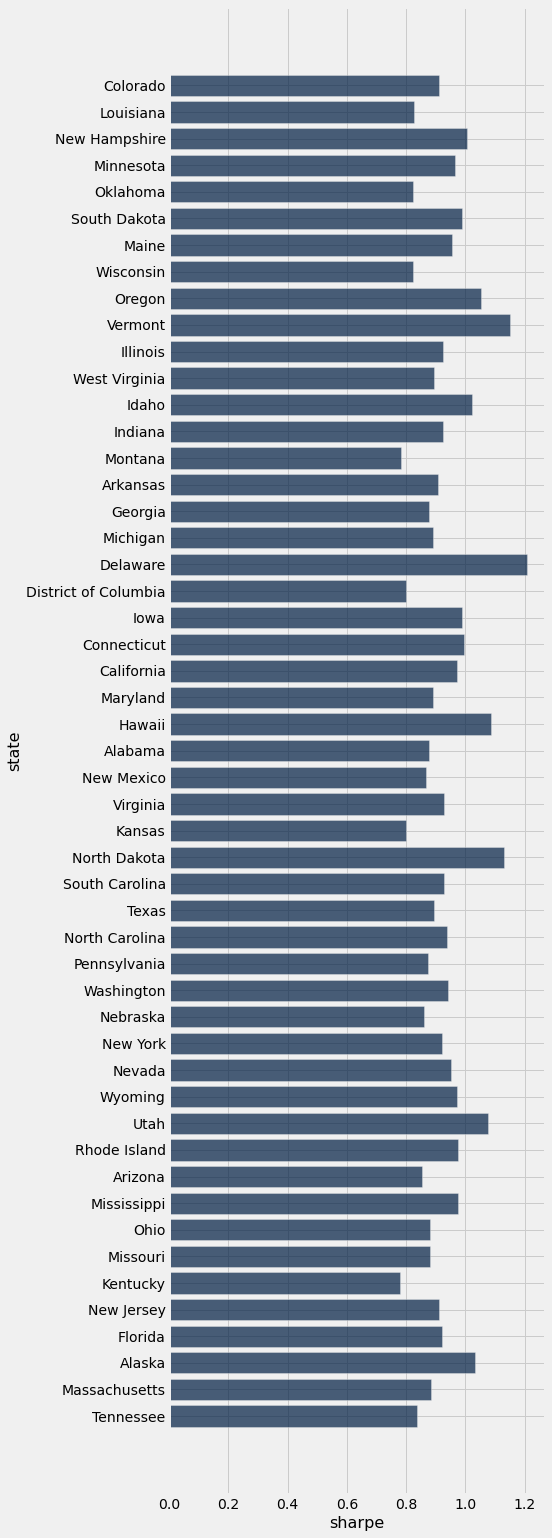

In [60]:
sharpe_ratio = Table().with_columns('state',shoes_set, 'sharpe',sharpe)
sharpe_ratio.barh('state')


[0.9092993595751557,
 0.825950102660084,
 1.0037080443488815,
 0.9660667626433501,
 0.824228523367115,
 0.9895144725489322,
 0.9530513425640255,
 0.8230254204011674,
 1.0537475721112017,
 1.151550271857085,
 0.9254413892800452,
 0.8926246980270789,
 1.02123220161192,
 0.9251842721551559,
 0.7833510808384648,
 0.9074440990030994,
 0.8779944261615328,
 0.8899633636335874,
 1.2082129852613166,
 0.7997139594495787,
 0.9879410719620364,
 0.9941890253345255,
 0.971737963747297,
 0.89086785484125,
 1.086108744276899,
 0.8759084826069563,
 0.8659844329221519,
 0.9284623258320571,
 0.8008094825921596,
 1.130276632195131,
 0.9265473275889426,
 0.8952018112335678,
 0.9373992549588094,
 0.8732710013090396,
 0.9395292135757429,
 0.8585818103633873,
 0.919514613113028,
 0.9496511954023114,
 0.9727410081045305,
 1.075203529800078,
 0.9764332394425069,
 0.8520505381924453,
 0.9756639242402563,
 0.8807846202978934,
 0.8789533906052662,
 0.7778261497881286,
 0.9110728273370009,
 0.9214689120158304,
 1.0

In [61]:
api = 'https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest'

In [68]:
import json
import urllib.request

url = urllib.request.urlopen(api).read()
url

HTTPError: HTTP Error 403: Forbidden

In [65]:
pop = json.loads(api.read())

AttributeError: 'str' object has no attribute 'read'

In [69]:
rl = """{"data":[{"ID State":"04000US01","State":"Alabama","ID Year":2019,"Year":"2019","Population":4903185,"Slug State":"alabama"},{"ID State":"04000US02","State":"Alaska","ID Year":2019,"Year":"2019","Population":731545,"Slug State":"alaska"},{"ID State":"04000US04","State":"Arizona","ID Year":2019,"Year":"2019","Population":7278717,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2019,"Year":"2019","Population":3017804,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2019,"Year":"2019","Population":39512223,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2019,"Year":"2019","Population":5758736,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2019,"Year":"2019","Population":3565287,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2019,"Year":"2019","Population":973764,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2019,"Year":"2019","Population":705749,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2019,"Year":"2019","Population":21477737,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2019,"Year":"2019","Population":10617423,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2019,"Year":"2019","Population":1415872,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2019,"Year":"2019","Population":1787065,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2019,"Year":"2019","Population":12671821,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2019,"Year":"2019","Population":6732219,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2019,"Year":"2019","Population":3155070,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2019,"Year":"2019","Population":2913314,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2019,"Year":"2019","Population":4467673,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2019,"Year":"2019","Population":4648794,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2019,"Year":"2019","Population":1344212,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2019,"Year":"2019","Population":6045680,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2019,"Year":"2019","Population":6892503,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2019,"Year":"2019","Population":9986857,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2019,"Year":"2019","Population":5639632,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2019,"Year":"2019","Population":2976149,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2019,"Year":"2019","Population":6137428,"Slug State":"missouri"},{"ID State":"04000US30","State":"Montana","ID Year":2019,"Year":"2019","Population":1068778,"Slug State":"montana"},{"ID State":"04000US31","State":"Nebraska","ID Year":2019,"Year":"2019","Population":1934408,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2019,"Year":"2019","Population":3080156,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2019,"Year":"2019","Population":1359711,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2019,"Year":"2019","Population":8882190,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2019,"Year":"2019","Population":2096829,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2019,"Year":"2019","Population":19453561,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2019,"Year":"2019","Population":10488084,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2019,"Year":"2019","Population":762062,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2019,"Year":"2019","Population":11689100,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2019,"Year":"2019","Population":3956971,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2019,"Year":"2019","Population":4217737,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2019,"Year":"2019","Population":12801989,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2019,"Year":"2019","Population":1059361,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2019,"Year":"2019","Population":5148714,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2019,"Year":"2019","Population":884659,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2019,"Year":"2019","Population":6829174,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2019,"Year":"2019","Population":28995881,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2019,"Year":"2019","Population":3205958,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2019,"Year":"2019","Population":623989,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2019,"Year":"2019","Population":8535519,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2019,"Year":"2019","Population":7614893,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2019,"Year":"2019","Population":1792147,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2019,"Year":"2019","Population":5822434,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2019,"Year":"2019","Population":578759,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2019,"Year":"2019","Population":3193694,"Slug State":"puerto-rico"}],"source":[{"measures":["Population"],"annotations":{"source_name":"Census Bureau","source_description":"The American Community Survey (ACS) is conducted by the US Census and sent to a portion of the population every year.","dataset_name":"ACS 1-year Estimate","dataset_link":"http://www.census.gov/programs-surveys/acs/","table_id":"B01003","topic":"Diversity","subtopic":"Demographics"},"name":"acs_yg_total_population_1","substitutions":[]}]}"""

In [72]:
pop = json.loads(rl)
pop

{'data': [{'ID State': '04000US01',
   'State': 'Alabama',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 4903185,
   'Slug State': 'alabama'},
  {'ID State': '04000US02',
   'State': 'Alaska',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 731545,
   'Slug State': 'alaska'},
  {'ID State': '04000US04',
   'State': 'Arizona',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 7278717,
   'Slug State': 'arizona'},
  {'ID State': '04000US05',
   'State': 'Arkansas',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 3017804,
   'Slug State': 'arkansas'},
  {'ID State': '04000US06',
   'State': 'California',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 39512223,
   'Slug State': 'california'},
  {'ID State': '04000US08',
   'State': 'Colorado',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 5758736,
   'Slug State': 'colorado'},
  {'ID State': '04000US09',
   'State': 'Connecticut',
   'ID Year': 2019,
   'Year': '2019',
   'Population': 356

In [103]:
state_pop = []
count = 0
for state in shoes_set:
    print(pop['data'][count]['Population'], pop['data'][count]['State'])
   
    state_pop.append(pop['data'][count]["Population"]/1e7)
    
    count += 1

4903185 Alabama
731545 Alaska
7278717 Arizona
3017804 Arkansas
39512223 California
5758736 Colorado
3565287 Connecticut
973764 Delaware
705749 District of Columbia
21477737 Florida
10617423 Georgia
1415872 Hawaii
1787065 Idaho
12671821 Illinois
6732219 Indiana
3155070 Iowa
2913314 Kansas
4467673 Kentucky
4648794 Louisiana
1344212 Maine
6045680 Maryland
6892503 Massachusetts
9986857 Michigan
5639632 Minnesota
2976149 Mississippi
6137428 Missouri
1068778 Montana
1934408 Nebraska
3080156 Nevada
1359711 New Hampshire
8882190 New Jersey
2096829 New Mexico
19453561 New York
10488084 North Carolina
762062 North Dakota
11689100 Ohio
3956971 Oklahoma
4217737 Oregon
12801989 Pennsylvania
1059361 Rhode Island
5148714 South Carolina
884659 South Dakota
6829174 Tennessee
28995881 Texas
3205958 Utah
623989 Vermont
8535519 Virginia
7614893 Washington
1792147 West Virginia
5822434 Wisconsin
578759 Wyoming


In [99]:
for thing in pop['data'][0]:
    print(
    #print(thing['ID State'])

SyntaxError: unexpected EOF while parsing (<ipython-input-99-e93f1121d278>, line 3)

In [105]:
print(pop['data'][0])

{'ID State': '04000US01', 'State': 'Alabama', 'ID Year': 2019, 'Year': '2019', 'Population': 4903185, 'Slug State': 'alabama'}


In [106]:
sharpe_pop = sharpe_ratio.with_column('Population', state_pop)

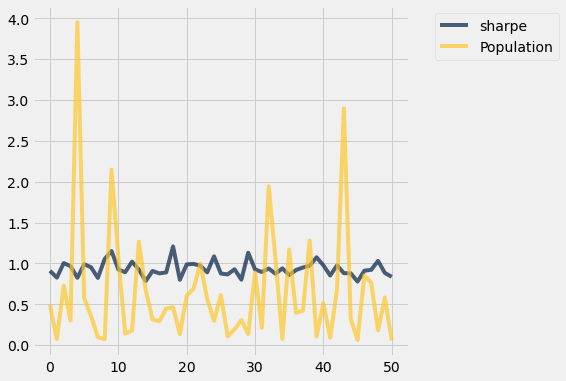

In [107]:
sharpe_pop.drop(0).plot()

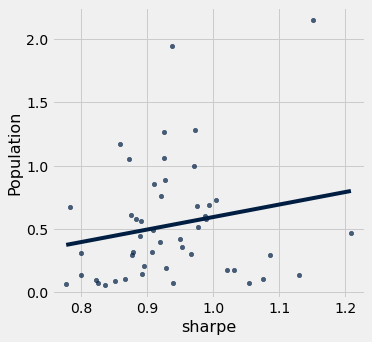

In [121]:
sharpe_pop.drop(0).exclude(4).exclude(-8).scatter(0, fit_line=True)